# Introduction to Regression with Neural Network in Tensorflow

There are many definitions for a regression problem but in our case, we're going to simplify it: predicting a numerical variable based on some other combination of variables, even shorter .... predicting a number

In [1]:
# Import Tensorflow
import tensorflow as tf
print(tf.__version__)

2.12.0


## Creating data to view and fit

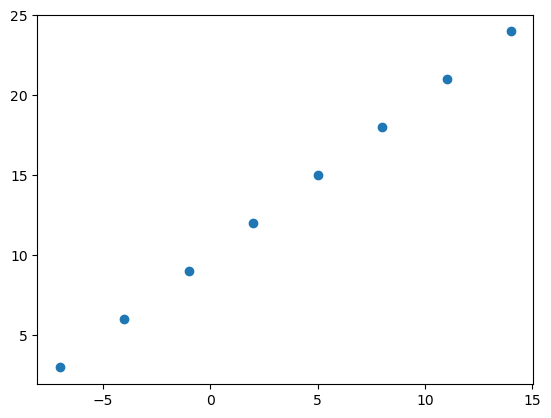

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Create Features
X = np.array([-7.0, -4.0, -1.0, 2.0, 5.0, 8.0, 11.0, 14.0])

# Create labels
y = np.array([3.0, 6.0, 9.0, 12.0, 15.0, 18.0, 21.0, 24.0])


# Visualize it
plt.scatter(X, y)

## Input and output shapes

In [3]:
# Create a demo tensor for our housing price prediction problem
house_info = tf.constant(['bedroom', 'bathroom', 'garage'])
house_price =tf.constant(939700)
house_info, house_price

(<tf.Tensor: shape=(3,), dtype=string, numpy=array([b'bedroom', b'bathroom', b'garage'], dtype=object)>,
 <tf.Tensor: shape=(), dtype=int32, numpy=939700>)

In [4]:
X[0], y[0]

(-7.0, 3.0)

In [5]:
X[1], y[1]

(-4.0, 6.0)

In [6]:
input_shape = X.shape
output_shape = y.shape

input_shape, output_shape

((8,), (8,))

In [7]:
X[0].ndim

0

In [8]:
X[0], y[0]

(-7.0, 3.0)

In [9]:
# Turn our Numpy arrays into tensors
X = tf.cast(tf.constant(X), dtype=tf.float32)
y = tf.cast(tf.constant(y), dtype=tf.float32)
X , y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [10]:
input_shape = X[0].shape
output_shape = y[0].shape
input_shape, output_shape

(TensorShape([]), TensorShape([]))

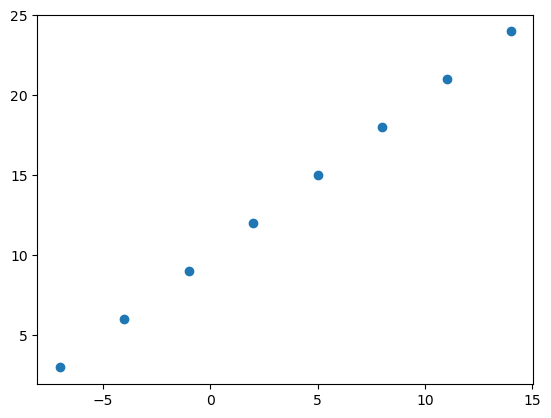

In [11]:
plt.scatter(X, y)

In [12]:
X.shape

TensorShape([8])

## steps in modelling with tensorflow

1. **Creating a model** - define the input and output layers, as well as the hidden layers of a deep learning model.
2. **Compile a model** - define the loss function (in other words, the function which tells our model how wrong it is) and the optimizer (tells our model how to improve the patterns the patters its learning) and evaluation metrics (waht we can use to intepret the performance of our model).
3. **Fitting a model** - letting the model try to find patterns between X & y (features and labels).

In [13]:
# set random seed
tf.random.set_seed(42)

# 1. Create a model using the Sequential API
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])


# 2. Compile the model
model.compile(loss=tf.keras.losses.mae, # mae = mean absolute error
             optimizer=tf.keras.optimizers.SGD(), # SGD is short Stochastic Gradient Descent
             metrics=['mae']
             )

# 3. Fit the model
model.fit(X, y, epochs=5)  # problem with current version if not set sequential Input above
# model.fit(tf.expand_dims(X, axis=-1), y, epochs=5)

Epoch 1/5


2023-06-30 14:22:59.250998: W tensorflow/tsl/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 0s 210ms/step - loss: 10.3631 - mae: 10.3631
Epoch 2/5
1/1 [==============================] - 0s 10ms/step - loss: 10.2306 - mae: 10.2306
Epoch 3/5
1/1 [==============================] - 0s 11ms/step - loss: 10.0981 - mae: 10.0981
Epoch 4/5
1/1 [==============================] - 0s 10ms/step - loss: 9.9656 - mae: 9.9656
Epoch 5/5
1/1 [==============================] - 0s 9ms/step - loss: 9.8331 - mae: 9.8331


In [14]:
# Check out X and y
X, y

(<tf.Tensor: shape=(8,), dtype=float32, numpy=array([-7., -4., -1.,  2.,  5.,  8., 11., 14.], dtype=float32)>,
 <tf.Tensor: shape=(8,), dtype=float32, numpy=array([ 3.,  6.,  9., 12., 15., 18., 21., 24.], dtype=float32)>)

In [15]:
# Try and make a prediction using or model
model.predict([17.0])

1/1 [==============================] - 0s 47ms/step


array([[18.261353]], dtype=float32)

### Improving our model

We can improve our model, by altering the steps we took to create a model.

1. **Creating a model** - here we might add more leayers, increase the number of hiddern units (all called neurons) within each of the hidden layers, change the activatoin function of each layers.
2. **Compiling a model** - here we might change optimization function or perhaps the **learning rate** of the optimization function.
3. **Fitting a model** = here we might fit a model for more **epochs** (leave it trainin for longer( or on more data (give the model more example to learn from)

In [16]:
# lets rebuild our model
# 1. create the model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae']
             )

# 3. Fit the model (this time we'll train the model for longer)
model.fit(X, y, epochs=100)

Epoch 1/100
1/1 [==============================] - 0s 147ms/step - loss: 16.1716 - mae: 16.1716
Epoch 2/100
1/1 [==============================] - 0s 10ms/step - loss: 15.8904 - mae: 15.8904
Epoch 3/100
1/1 [==============================] - 0s 9ms/step - loss: 15.6091 - mae: 15.6091
Epoch 4/100
1/1 [==============================] - 0s 10ms/step - loss: 15.3279 - mae: 15.3279
Epoch 5/100
1/1 [==============================] - 0s 11ms/step - loss: 15.0466 - mae: 15.0466
Epoch 6/100
1/1 [==============================] - 0s 11ms/step - loss: 14.8248 - mae: 14.8248
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 14.6923 - mae: 14.6923
Epoch 8/100
1/1 [==============================] - 0s 10ms/step - loss: 14.5598 - mae: 14.5598
Epoch 9/100
1/1 [==============================] - 0s 11ms/step - loss: 14.4273 - mae: 14.4273
Epoch 10/100
1/1 [==============================] - 0s 11ms/step - loss: 14.2948 - mae: 14.2948
Epoch 11/100
1/1 [==============================]

In [17]:
# Let's see if our model's prediction has improved
model.predict([17.0])

1/1 [==============================] - 0s 33ms/step


array([[29.38552]], dtype=float32)

In [18]:
# again let's rebuild our model
model = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(100, activation=None),
    tf.keras.layers.Dense(1)
])

# compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.Adam(lr=0.001),
             metrics=['mae'])

# Fit the model
model.fit(X, y, epochs=100)


Epoch 1/100
1/1 [==============================] - 0s 376ms/step - loss: 12.4190 - mae: 12.4190
Epoch 2/100
1/1 [==============================] - 0s 13ms/step - loss: 11.2548 - mae: 11.2548
Epoch 3/100
1/1 [==============================] - 0s 12ms/step - loss: 10.0621 - mae: 10.0621
Epoch 4/100
1/1 [==============================] - 0s 17ms/step - loss: 8.8269 - mae: 8.8269
Epoch 5/100
1/1 [==============================] - 0s 12ms/step - loss: 7.5349 - mae: 7.5349
Epoch 6/100
1/1 [==============================] - 0s 13ms/step - loss: 7.7322 - mae: 7.7322
Epoch 7/100
1/1 [==============================] - 0s 11ms/step - loss: 8.4058 - mae: 8.4058
Epoch 8/100
1/1 [==============================] - 0s 12ms/step - loss: 8.6023 - mae: 8.6023
Epoch 9/100
1/1 [==============================] - 0s 12ms/step - loss: 8.2888 - mae: 8.2888
Epoch 10/100
1/1 [==============================] - 0s 12ms/step - loss: 7.8608 - mae: 7.8608
Epoch 11/100
1/1 [==============================] - 0s 13ms/st

In [19]:
# let's predict
model.predict([17.0])

1/1 [==============================] - 0s 51ms/step


array([[27.845528]], dtype=float32)

## Evaluating a model

In practice, a typical workflow you'll go through when building neural network is:

```
Build a model -> fit it -. evaluate it -> tweak a model -> fit it -> evaluate it -> tweak a model -> fit it -> evaluate it
```

When it comes ot evaluation... there are 3 words you should memorize:

"Visualize, visualize, visualize"

It's a good idea to visualize:
* The data - what data are we working with what does it look like?
* The model itself - what does our model look like/
* The training of a model - how does a model perform while it learns?
* The predictions of the modle - how do the predictions of a model line up against ground truth (the original labels)

In [20]:
# make a bigger dataset

X = tf.range(-100, 100, 4)
X

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-100,  -96,  -92,  -88,  -84,  -80,  -76,  -72,  -68,  -64,  -60,
        -56,  -52,  -48,  -44,  -40,  -36,  -32,  -28,  -24,  -20,  -16,
        -12,   -8,   -4,    0,    4,    8,   12,   16,   20,   24,   28,
         32,   36,   40,   44,   48,   52,   56,   60,   64,   68,   72,
         76,   80,   84,   88,   92,   96], dtype=int32)>

In [21]:
# Make labels for the dataset
y = X + 10
y

<tf.Tensor: shape=(50,), dtype=int32, numpy=
array([-90, -86, -82, -78, -74, -70, -66, -62, -58, -54, -50, -46, -42,
       -38, -34, -30, -26, -22, -18, -14, -10,  -6,  -2,   2,   6,  10,
        14,  18,  22,  26,  30,  34,  38,  42,  46,  50,  54,  58,  62,
        66,  70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

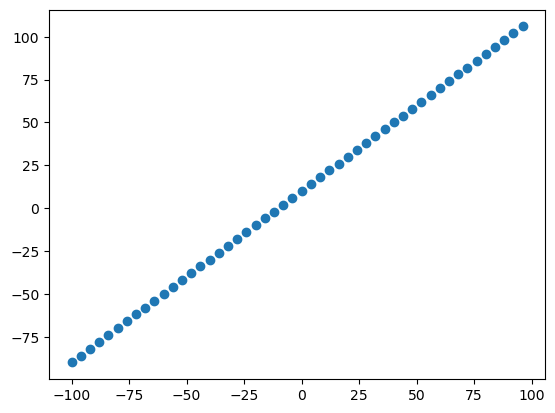

In [22]:
# visualize the data
import matplotlib.pyplot as plt

plt.scatter(X, y)

### The 3 sets...

* **Training set** - the model learns from this data, which is typically 70-80% of the total data you have available.
* **Validation set** - the model gets tuned on this data, which is typically 10-15% of the data available.
* **Test set** -the model gets evaluated on this data to test what it has learned, this set is typically 10-15% of the total data available

In [23]:
# Check the lenght of how many samples we have
len(X)

50

In [24]:
# Split the data into train and test sets
X_train = X[:40] # first 40 are training sample (80% of the data)
y_train = y[:40]

X_test = X[40:] # last 10 are the testing samples (20% of the data)
y_test = y[40:]

len(X_train), len(X_test), len(y_train), len(y_test)

(40, 10, 40, 10)

In [25]:
X.shape

TensorShape([50])

### Visualizing the data
Now we've got our data in training and test sets... let's visualize it again!

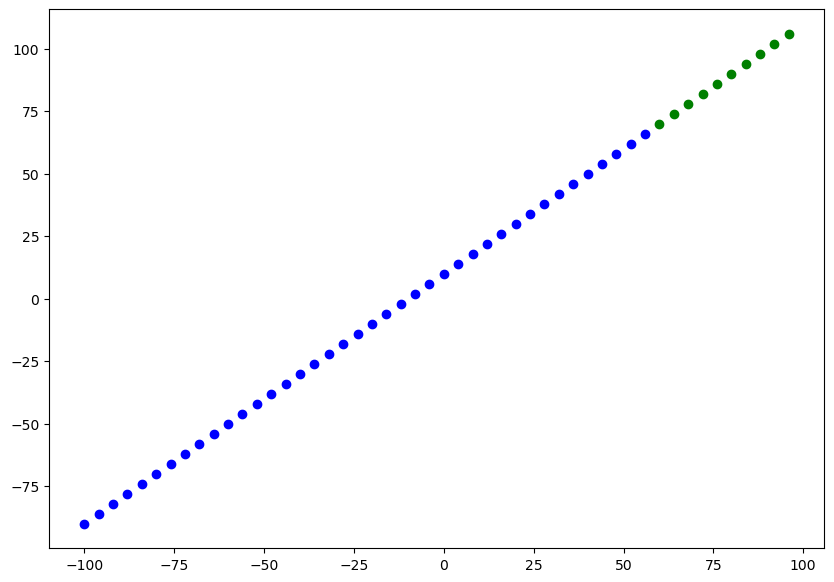

In [26]:
plt.figure(figsize=(10, 7))
# plot training data in blue
plt.scatter(X_train, y_train, c='b', label="Training data")
#plot test data in green
plt.scatter(X_test, y_test, c='g', label="Testing Data")
plt.show()

In [27]:
# Let's have a loot at how to build a neural network for out data

# 1. Create a model
model = tf.keras.Sequential([
#     tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
    
])

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])

# # 3. Fit the model
# model.fit(X_train, y_train, epochs=100)

In [28]:
### Visualizing the model

In [29]:
# model.summary() # throws value error

In [30]:
# let's create a model which builds automatically by defing the input_shape argument in the first layer

tf.random.set_seed(42)

# 1. Create a model (same as above)
model = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=[1], name="input-layer"),
    tf.keras.layers.Dense(1, name="output_layer")
], name="model_1")

# 2. Compile the model
model.compile(loss=tf.keras.losses.mae,
             optimizer=tf.keras.optimizers.SGD(),
             metrics=['mae'])


In [31]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


* Total params - total number of parameters in the model.
* Trainable paramaters - these are the paramaters (patterns) the model can pudate as it trains.
* Non-trainable params - these parameters aren't updated during training (this is typical when you bring in already learn patters or parameters from other models during **transfer learning**).

📖 **Resource:** For a more in-depth overview of the trainable parameters within a layer, check out MIT's introduction to deep learning video.

🛠️ **Exercise:** Try playing around with the number of hidden units inthe dense layer, see how that effects the number of parameters (total and trainable) by calling `model.summary()`.

In [32]:
# Let's fit our model to the training data
model.fit(X_train, y_train, epochs=100, verbose=0)

In [33]:
# Get a summary of our model
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


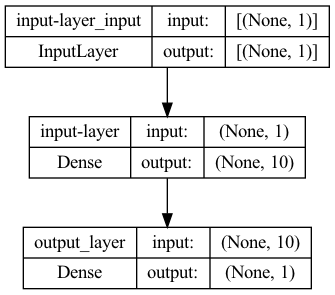

In [34]:
from tensorflow.keras.utils import plot_model

plot_model(model=model, show_shapes=True)

### Visualizing our model's predictions

To visualize predictions, it's a good idea to plot them against the groud truth labels.

Ofter you'll see this in the form of `y_test` or `y_pred` (ground truth versus your model's predictions)

In [35]:
# Make some predictions
y_pred = model.predict(X_test)
y_pred

1/1 [==============================] - 0s 40ms/step


array([[ 78.16021 ],
       [ 83.25637 ],
       [ 88.35253 ],
       [ 93.44871 ],
       [ 98.544876],
       [103.64104 ],
       [108.7372  ],
       [113.83337 ],
       [118.929535],
       [124.02571 ]], dtype=float32)

In [36]:
y_test

<tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>

🔑 **Note:** If you feel like you're going to reuse some kind of functionality in the future, it's a good idea to turn it into function.

In [37]:
# Let's create a plotting function

def plot_preictios(train_data=X_train,
                  train_labels=y_train,
                  test_data=X_test,
                  test_labels=y_test,
                  predictions=y_pred):
    """
    Plots training data, test data and compares predictions to ground truth labels
    """
    
    plt.figure(figsize=(10, 7))
    # Plot training data in blue
    plt.scatter(train_data, train_labels, c="b", label="Training data")
    # Plot testing data in green
    plt.scatter(test_data, test_labels, c="g", label="Testing data")
    # Plot model's prediction in red
    plt.scatter(test_data, predictions, c="r", label="Predictions")
    # show the legend
    plt.legend();
    

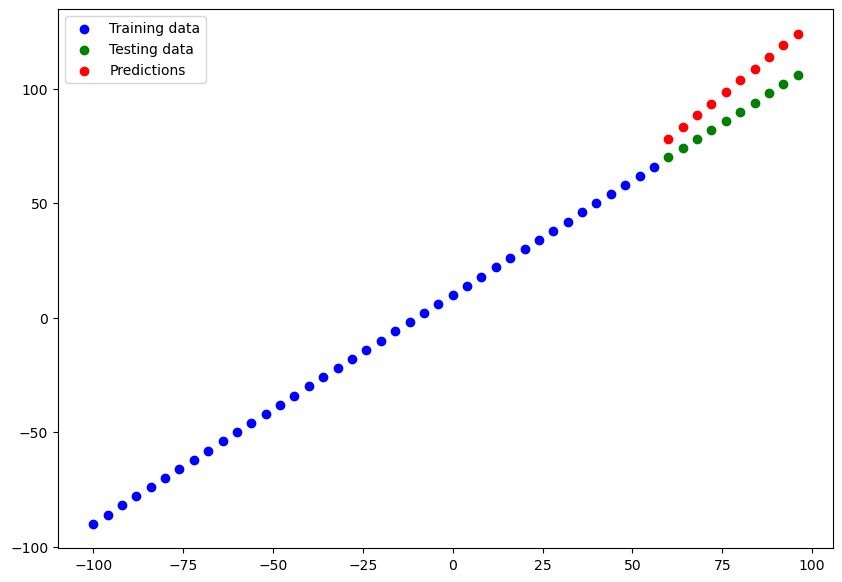

In [38]:
plot_preictios()

### Evaluating our model's predictions with regression evluation matrics

Depending on the problem you're working on, there will be different evaluation metrics to evaluate your model's performance.

Since we're working on a regression, two of the main metrics:
* MAE - mean absolute error, "on average, how wrong is each of my model's predictions"
* MSE - mean square error, "square the average errors"

In [39]:
# Evaluate the model on the test
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 101ms/step - loss: 13.0930 - mae: 13.0930


[13.0929536819458, 13.0929536819458]

In [40]:
y_pred, y_test

(array([[ 78.16021 ],
        [ 83.25637 ],
        [ 88.35253 ],
        [ 93.44871 ],
        [ 98.544876],
        [103.64104 ],
        [108.7372  ],
        [113.83337 ],
        [118.929535],
        [124.02571 ]], dtype=float32),
 <tf.Tensor: shape=(10,), dtype=int32, numpy=array([ 70,  74,  78,  82,  86,  90,  94,  98, 102, 106], dtype=int32)>)

In [41]:
# Calculate the mean absolute error
mae = tf.metrics.mean_absolute_error(y_test, tf.constant(y_pred))
mae

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([12.3359165, 10.548726 , 10.       , 10.689742 , 12.726926 ,
       16.11283  , 20.737198 , 25.833368 , 30.929535 , 36.02571  ],
      dtype=float32)>

In [42]:
tf.squeeze(y_pred)

<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([ 78.16021 ,  83.25637 ,  88.35253 ,  93.44871 ,  98.544876,
       103.64104 , 108.7372  , 113.83337 , 118.929535, 124.02571 ],
      dtype=float32)>

In [43]:
# Calculate the man abosolute error
mae = tf.metrics.mean_absolute_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mae

<tf.Tensor: shape=(), dtype=float32, numpy=13.092954>

In [44]:
# Calculate the mean squared error
mse = tf.metrics.mean_squared_error(y_true=y_test, y_pred=tf.squeeze(y_pred))
mse

<tf.Tensor: shape=(), dtype=float32, numpy=181.3385>

In [45]:
# Make some functions to reuse MAE and MSE

def mae(y_true, y_pred):
    return tf.metrics.mean_absolute_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

def mse(y_true, y_pred):
    return tf.metrics.mean_squared_error(y_true=y_true, y_pred=tf.squeeze(y_pred))

### Running experiemnts to improve our model

```
Build a model -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it -> tweak it -> fit it -> evaluate it ....
```

1. Get more data - get more examples for your model to train on (more opportunities to learn patterns or relationships between feature and labels).
2. Make your model larger (using a more complex model) - this might come in the form or more layers of more hidden units in each layers.
3. Train for longer - give your model more of a chance to find patterns in the data.


Let's do 3 modelling experiments:
1. `model_1` - same as the original model, 1 layer, trained for 100 epochs.
2. `model_2` - 2 layers, trained ofr 100 epochs
3. `model_3` - 2 layers, trained for 500 epochs

**Build model_1**

In [46]:
# Set random seed
tf.random.set_seed(42)

# 1. Create the model
model_1 = tf.keras.Sequential([
    tf.keras.Input(shape=(1,)),
    tf.keras.layers.Dense(1)
])

# 2. compile the model
model_1.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# 3. fit the model
model_1.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 36ms/step - loss: 8.1974 - mae: 8.1974
Epoch 2/100
2/2 [==============================] - 0s 11ms/step - loss: 10.8087 - mae: 10.8087
Epoch 3/100
2/2 [==============================] - 0s 10ms/step - loss: 11.4779 - mae: 11.4779
Epoch 4/100
2/2 [==============================] - 0s 10ms/step - loss: 9.4462 - mae: 9.4462
Epoch 5/100
2/2 [==============================] - 0s 10ms/step - loss: 10.3382 - mae: 10.3382
Epoch 6/100
2/2 [==============================] - 0s 10ms/step - loss: 9.5796 - mae: 9.5796
Epoch 7/100
2/2 [==============================] - 0s 9ms/step - loss: 8.6945 - mae: 8.6945
Epoch 8/100
2/2 [==============================] - 0s 9ms/step - loss: 9.0501 - mae: 9.0501
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 19.0713 - mae: 19.0713
Epoch 10/100
2/2 [==============================] - 0s 10ms/step - loss: 10.2886 - mae: 10.2886
Epoch 11/100
2/2 [==============================] - 0s 10ms/s

1/1 [==============================] - 0s 34ms/step


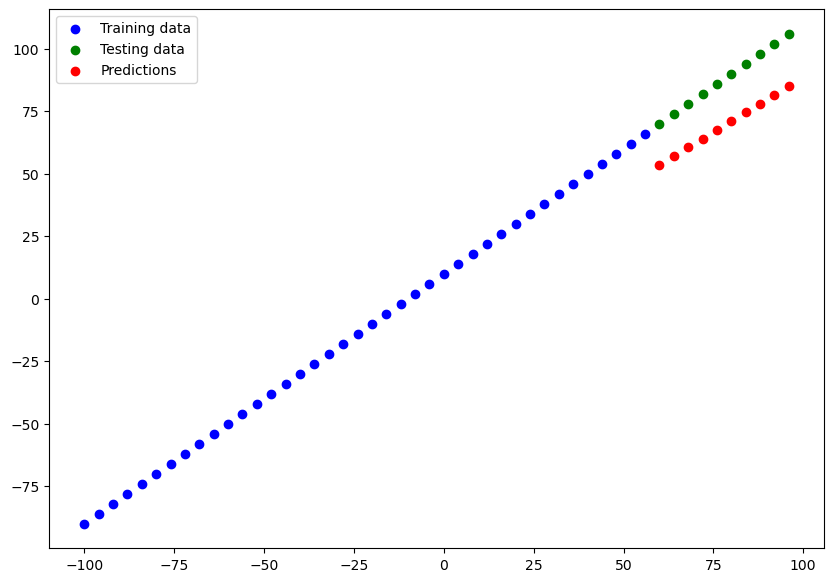

In [47]:
# make and plot predictions for model_1
y_pred_1 = model_1.predict(X_test)
plot_preictios(predictions=y_pred_1)

In [48]:
# evaluate the model_1
mae_1 = mae(y_test, y_pred_1) # squeeze remove the ,1 dimension
mse_1 = mse(y_test, y_pred_1)
mae_1, mse_1

(<tf.Tensor: shape=(), dtype=float32, numpy=18.669119>,
 <tf.Tensor: shape=(), dtype=float32, numpy=350.7015>)

**Build `model_2`**

* 2 dense layers, trained for 100 epochs

In [49]:
# Set the random seed
tf.random.set_seed(42)

# Create model_2
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# compile model_2
model_2.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# fit the model
model_2.fit(X_train, y_train, epochs=100)

Epoch 1/100
2/2 [==============================] - 0s 38ms/step - loss: 18.4895 - mae: 18.4895
Epoch 2/100
2/2 [==============================] - 0s 10ms/step - loss: 9.9381 - mae: 9.9381
Epoch 3/100
2/2 [==============================] - 0s 11ms/step - loss: 21.5235 - mae: 21.5235
Epoch 4/100
2/2 [==============================] - 0s 11ms/step - loss: 12.4436 - mae: 12.4436
Epoch 5/100
2/2 [==============================] - 0s 12ms/step - loss: 13.5635 - mae: 13.5635
Epoch 6/100
2/2 [==============================] - 0s 12ms/step - loss: 10.8911 - mae: 10.8911
Epoch 7/100
2/2 [==============================] - 0s 10ms/step - loss: 11.8537 - mae: 11.8537
Epoch 8/100
2/2 [==============================] - 0s 10ms/step - loss: 10.7627 - mae: 10.7627
Epoch 9/100
2/2 [==============================] - 0s 10ms/step - loss: 36.7782 - mae: 36.7782
Epoch 10/100
2/2 [==============================] - 0s 11ms/step - loss: 24.5606 - mae: 24.5606
Epoch 11/100
2/2 [==============================] -

1/1 [==============================] - 0s 31ms/step


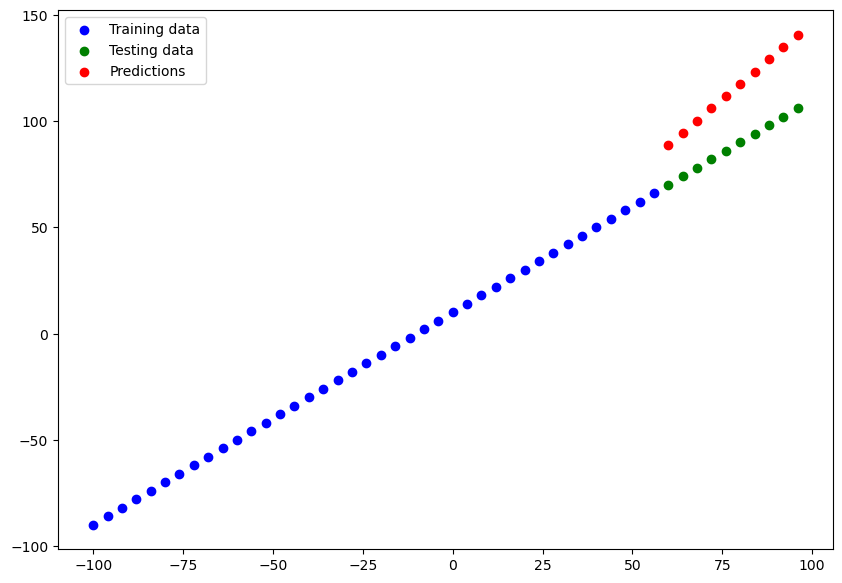

In [50]:
# visualize the model_2
y_pred_2 = model_2.predict(X_test)
plot_preictios(predictions=y_pred_2)

In [51]:
# evaluate the model
mae_2 = mae(y_test, y_pred_2)
mse_2 = mse(y_test, y_pred_2)
mae_2, mse_2

(<tf.Tensor: shape=(), dtype=float32, numpy=26.663862>,
 <tf.Tensor: shape=(), dtype=float32, numpy=737.21466>)

**Build `model_3`**

* 2 layers trained for 500 epochs

In [52]:
# set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(10, input_shape=(1,)),
    tf.keras.layers.Dense(1)
])

# Compile the model
model_3.compile(loss=tf.keras.losses.mae,
               optimizer=tf.keras.optimizers.SGD(),
               metrics=['mae'])

# Fit the model
model_3.fit(X_train, y_train, epochs=500)

Epoch 1/500
2/2 [==============================] - 0s 36ms/step - loss: 41.8157 - mae: 41.8157
Epoch 2/500
2/2 [==============================] - 0s 11ms/step - loss: 23.9786 - mae: 23.9786
Epoch 3/500
2/2 [==============================] - 0s 11ms/step - loss: 14.2409 - mae: 14.2409
Epoch 4/500
2/2 [==============================] - 0s 10ms/step - loss: 18.5646 - mae: 18.5646
Epoch 5/500
2/2 [==============================] - 0s 10ms/step - loss: 14.3002 - mae: 14.3002
Epoch 6/500
2/2 [==============================] - 0s 9ms/step - loss: 11.4158 - mae: 11.4158
Epoch 7/500
2/2 [==============================] - 0s 10ms/step - loss: 12.4378 - mae: 12.4378
Epoch 8/500
2/2 [==============================] - 0s 10ms/step - loss: 10.9583 - mae: 10.9583
Epoch 9/500
2/2 [==============================] - 0s 10ms/step - loss: 38.7639 - mae: 38.7639
Epoch 10/500
2/2 [==============================] - 0s 9ms/step - loss: 26.3740 - mae: 26.3740
Epoch 11/500
2/2 [==============================] -

2/2 [==============================] - 0s 9ms/step - loss: 19.2168 - mae: 19.2168
Epoch 88/500
2/2 [==============================] - 0s 10ms/step - loss: 29.5511 - mae: 29.5511
Epoch 89/500
2/2 [==============================] - 0s 10ms/step - loss: 10.1655 - mae: 10.1655
Epoch 90/500
2/2 [==============================] - 0s 9ms/step - loss: 21.2851 - mae: 21.2851
Epoch 91/500
2/2 [==============================] - 0s 11ms/step - loss: 10.5422 - mae: 10.5422
Epoch 92/500
2/2 [==============================] - 0s 10ms/step - loss: 18.1726 - mae: 18.1726
Epoch 93/500
2/2 [==============================] - 0s 10ms/step - loss: 6.5683 - mae: 6.5683
Epoch 94/500
2/2 [==============================] - 0s 10ms/step - loss: 11.1929 - mae: 11.1929
Epoch 95/500
2/2 [==============================] - 0s 9ms/step - loss: 24.5827 - mae: 24.5827
Epoch 96/500
2/2 [==============================] - 0s 10ms/step - loss: 10.8007 - mae: 10.8007
Epoch 97/500
2/2 [==============================] - 0s 10m

2/2 [==============================] - 0s 9ms/step - loss: 14.4845 - mae: 14.4845
Epoch 258/500
2/2 [==============================] - 0s 10ms/step - loss: 5.8451 - mae: 5.8451
Epoch 259/500
2/2 [==============================] - 0s 9ms/step - loss: 14.8451 - mae: 14.8451
Epoch 260/500
2/2 [==============================] - 0s 10ms/step - loss: 14.9877 - mae: 14.9877
Epoch 261/500
2/2 [==============================] - 0s 9ms/step - loss: 17.4802 - mae: 17.4802
Epoch 262/500
2/2 [==============================] - 0s 10ms/step - loss: 15.5517 - mae: 15.5517
Epoch 263/500
2/2 [==============================] - 0s 9ms/step - loss: 10.1020 - mae: 10.1020
Epoch 264/500
2/2 [==============================] - 0s 11ms/step - loss: 20.2266 - mae: 20.2266
Epoch 265/500
2/2 [==============================] - 0s 9ms/step - loss: 9.7357 - mae: 9.7357
Epoch 266/500
2/2 [==============================] - 0s 9ms/step - loss: 7.8318 - mae: 7.8318
Epoch 267/500
2/2 [==============================] - 0s 

2/2 [==============================] - 0s 9ms/step - loss: 11.3342 - mae: 11.3342
Epoch 428/500
2/2 [==============================] - 0s 9ms/step - loss: 8.9469 - mae: 8.9469
Epoch 429/500
2/2 [==============================] - 0s 10ms/step - loss: 25.8033 - mae: 25.8033
Epoch 430/500
2/2 [==============================] - 0s 9ms/step - loss: 17.5528 - mae: 17.5528
Epoch 431/500
2/2 [==============================] - 0s 10ms/step - loss: 10.7127 - mae: 10.7127
Epoch 432/500
2/2 [==============================] - 0s 10ms/step - loss: 11.5787 - mae: 11.5787
Epoch 433/500
2/2 [==============================] - 0s 9ms/step - loss: 11.3661 - mae: 11.3661
Epoch 434/500
2/2 [==============================] - 0s 9ms/step - loss: 30.3572 - mae: 30.3572
Epoch 435/500
2/2 [==============================] - 0s 9ms/step - loss: 10.4840 - mae: 10.4840
Epoch 436/500
2/2 [==============================] - 0s 9ms/step - loss: 28.8343 - mae: 28.8343
Epoch 437/500
2/2 [==============================] - 

1/1 [==============================] - 0s 29ms/step


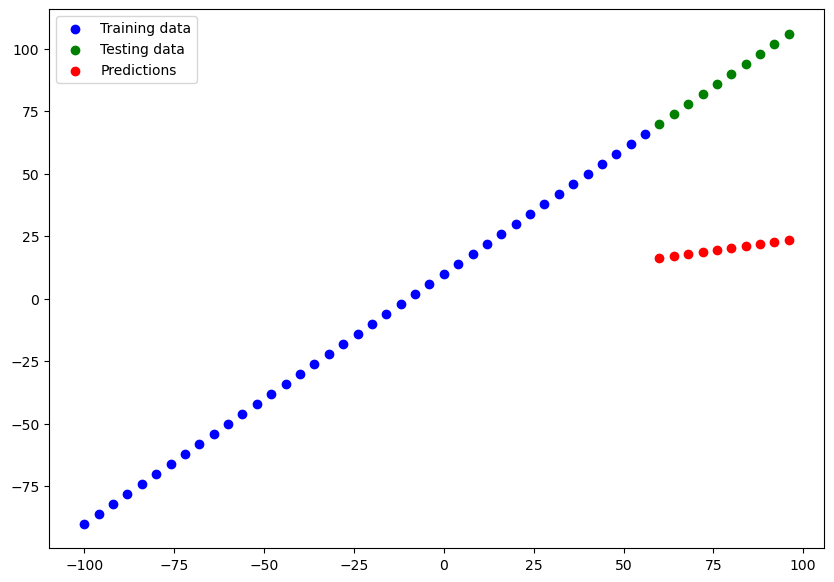

In [53]:
# Make and plot some predictions
y_pred_3 = model_3.predict(X_test)
plot_preictios(predictions=y_pred_3)

In [54]:
# evaluate the model
mae_3 = mae(y_test, y_pred_3)
mse_3 = mse(y_test, y_pred_3)
mae_3, mse_3

(<tf.Tensor: shape=(), dtype=float32, numpy=68.12807>,
 <tf.Tensor: shape=(), dtype=float32, numpy=4726.285>)

🔑 **Note:** You want to start with small experiments and make sure they work and then increase their scale when necessary.

## Comparing the results of our experiments

We've runa few experiments, let's compare the result

In [55]:
# Let's compare our model's results using pandas DataFrame
import pandas as pd

model_results = [["model", mae(y_test, y_pred).numpy(), mse(y_test, y_pred).numpy()],
                 ["model_1", mae_1.numpy(), mse_1.numpy()],
                ["model_2", mae_2.numpy(), mse_2.numpy()],
                ["model_3", mae_3.numpy(), mse_3.numpy()]]

all_results = pd.DataFrame(model_results, columns=["model", "mae", "mse"])
all_results

,model,mae,mse
0,model,13.092954,181.338501
1,model_1,18.669119,350.701508
2,model_2,26.663862,737.214661
3,model_3,68.128067,4726.285156


In [56]:
model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


🔑 **Note:** One of your main goals should be to minimize the time between your experiments. Themore experiment you do, the more things you'll figure out which don't work and in turn, get closer to figuring out what does work. Remember the machine learning practioner's motto: "experiment, experiment, experiment".

## Tracking your experiments

One really good habit in machine learning modelling is to track the results of your experiments.

And when doing so, it can be tedious if you're running lots of experiments.

Luckily, there are tools to help us!

📖 **Resource:** As you build more models, you'll want to look into using:

* TensorBoard - a component of the TensorFlow library to help track modelling experiments (we'll see this one later).
* Weights & Biases - a tool for tracking all kinds of machine learning experiments (plugs straight into tensorboard).

## Saving our models

Saving our models allows us to use them outside of our local environment (or wherever they are trained) such as in a web applicatoin or a mobile app.

Thre are two main formats we can save our model's too:

1. The SavedModel format
2. The HDF5 format

In [57]:
# Save a model using the SavedModel format
model.save("best_model_SavedModel_format")

INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


INFO:tensorflow:Assets written to: best_model_SavedModel_format/assets


In [58]:
# Save a model using the HDF5 format
model.save("best_model_HDF5_format.h5")

## Loading in a saved model

In [59]:
# Load in the SavedModel format model
loaded_SavedModel_format = tf.keras.models.load_model('best_model_SavedModel_format')
loaded_SavedModel_format.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [60]:
# Compare model_2 predictions with SavedModel format model prediction
model_preds = model.predict(X_test)
loaded_SavedModel_format_preds = loaded_SavedModel_format.predict(X_test)

model_preds == loaded_SavedModel_format_preds

1/1 [==============================] - 0s 29ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

In [61]:
# Load in a model using the .h5 format
loaded_h5_model = tf.keras.models.load_model('best_model_HDF5_format.h5')
loaded_h5_model.summary()

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input-layer (Dense)         (None, 10)                20        
                                                                 
 output_layer (Dense)        (None, 1)                 11        
                                                                 
Total params: 31
Trainable params: 31
Non-trainable params: 0
_________________________________________________________________


In [62]:
# Check to see if loaded .h5 model predictions match model_2
model_preds = model.predict(X_test)
loaded_h5_model_preds = loaded_h5_model.predict(X_test)
model_preds == loaded_h5_model_preds

1/1 [==============================] - 0s 30ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True]])

## A larger example

In [63]:
# import required librarlies
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
insurance = pd.read_csv('./insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [65]:
# Let's try one-hot encode our Dataframe so it's all numbers
insurance_one_hot = pd.get_dummies(insurance)
insurance_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [66]:
# Create X & y values (features and labels)
X = insurance_one_hot.drop(columns=['charges'], axis=1)
y = insurance_one_hot['charges']

In [67]:
# veiw X
X.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [68]:
# view y
y.head()

0    16884.92400
1     1725.55230
2     4449.46200
3    21984.47061
4     3866.85520
Name: charges, dtype: float64

In [69]:
# Create training and test sets
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
len(X), len(y), len(X_train), len(X_test), len(y_train), len(y_test)

(1338, 1338, 1070, 268, 1070, 268)

In [70]:
# Build a neural network (sort of like model 2 above)

# set random seed
tf.random.set_seed(42)

# Create a model

insurance_model = tf.keras.Sequential([
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.SGD(),
                       metrics=['mae'])

# Fit the model
insurance_model.fit(X_train, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 8561.1738 - mae: 8561.1738
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 7881.1348 - mae: 7881.1348
Epoch 3/100
34/34 [==============================] - 0s 6ms/step - loss: 7584.2734 - mae: 7584.2734
Epoch 4/100
34/34 [==============================] - 0s 6ms/step - loss: 7735.1372 - mae: 7735.1372
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 7801.2397 - mae: 7801.2397
Epoch 6/100
34/34 [==============================] - 0s 6ms/step - loss: 7599.5518 - mae: 7599.5518
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 7531.3477 - mae: 7531.3477
Epoch 8/100
34/34 [==============================] - 0s 6ms/step - loss: 7781.4058 - mae: 7781.4058
Epoch 9/100
34/34 [==============================] - 0s 6ms/step - loss: 7477.0264 - mae: 7477.0264
Epoch 10/100
34/34 [==============================] - 0s 6ms/step - loss: 7738.5688 - mae: 7738.5688

In [71]:
# Check the results of the insurance model on the test data
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 8ms/step - loss: 7060.9683 - mae: 7060.9683


[7060.96826171875, 7060.96826171875]

In [72]:
y_train.median(), y_train.mean()

(9575.4421, 13346.089736364485)

Right now it looks like our model isn't performing too well ... lets try and improve it

To (try) improve our model, we'll run 2 experiments:

    1. Add an extra layer with more hidden unts and use Adam optimizer
    2. Same as above but train for longer(200 spochs)
  

In [73]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_2.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=["mae"])

# Fit the model
insurance_model_2.fit(X_train, y_train, epochs=100, verbose=0)

In [74]:
# Evaluate the larger model
insurance_model_2.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 4891.2520 - mae: 4891.2520


[4891.251953125, 4891.251953125]

In [75]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7060.9683 - mae: 7060.9683


[7060.96826171875, 7060.96826171875]

In [76]:
# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1)
])

# Compile the model
insurance_model_3.compile(loss=tf.keras.losses.mae,
                         optimizer=tf.keras.optimizers.Adam(),
                         metrics=['mae'])

# Fit the model
history = insurance_model_3.fit(X_train, y_train, epochs=200)

Epoch 1/200
34/34 [==============================] - 1s 9ms/step - loss: 13290.2598 - mae: 13290.2598
Epoch 2/200
34/34 [==============================] - 0s 8ms/step - loss: 13127.4775 - mae: 13127.4775
Epoch 3/200
34/34 [==============================] - 0s 9ms/step - loss: 12778.3730 - mae: 12778.3730
Epoch 4/200
34/34 [==============================] - 0s 7ms/step - loss: 12091.8271 - mae: 12091.8271
Epoch 5/200
34/34 [==============================] - 0s 7ms/step - loss: 10951.2012 - mae: 10951.2012
Epoch 6/200
34/34 [==============================] - 0s 8ms/step - loss: 9511.6113 - mae: 9511.6113
Epoch 7/200
34/34 [==============================] - 0s 7ms/step - loss: 8200.4277 - mae: 8200.4277
Epoch 8/200
34/34 [==============================] - 0s 7ms/step - loss: 7566.1357 - mae: 7566.1357
Epoch 9/200
34/34 [==============================] - 0s 8ms/step - loss: 7456.6362 - mae: 7456.6362
Epoch 10/200
34/34 [==============================] - 0s 7ms/step - loss: 7434.9619 - mae:

34/34 [==============================] - 0s 7ms/step - loss: 5844.2852 - mae: 5844.2852
Epoch 83/200
34/34 [==============================] - 0s 7ms/step - loss: 5816.0605 - mae: 5816.0605
Epoch 84/200
34/34 [==============================] - 0s 7ms/step - loss: 5783.3125 - mae: 5783.3125
Epoch 85/200
34/34 [==============================] - 0s 7ms/step - loss: 5756.7402 - mae: 5756.7402
Epoch 86/200
34/34 [==============================] - 0s 8ms/step - loss: 5722.8140 - mae: 5722.8140
Epoch 87/200
34/34 [==============================] - 0s 9ms/step - loss: 5687.7090 - mae: 5687.7090
Epoch 88/200
34/34 [==============================] - 0s 7ms/step - loss: 5654.0093 - mae: 5654.0093
Epoch 89/200
34/34 [==============================] - 0s 8ms/step - loss: 5616.1162 - mae: 5616.1162
Epoch 90/200
34/34 [==============================] - 0s 8ms/step - loss: 5575.9009 - mae: 5575.9009
Epoch 91/200
34/34 [==============================] - 0s 8ms/step - loss: 5541.4609 - mae: 5541.4609
Epo

In [77]:
# Evaluate the model
insurance_model_3.evaluate(X_test, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3494.5461 - mae: 3494.5461


[3494.546142578125, 3494.546142578125]

In [78]:
insurance_model.evaluate(X_test, y_test)

9/9 [==============================] - 0s 6ms/step - loss: 7060.9683 - mae: 7060.9683


[7060.96826171875, 7060.96826171875]

Text(0.5, 0, 'epochs')

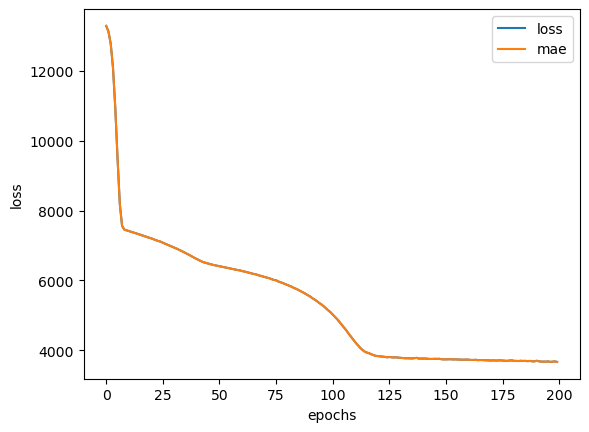

In [79]:
# Plot history 9also known as a loss curve or a training curve
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs")

## Preprocessing data (normalization and standardization)

In terms of scaling values, neural networks tend to prefer normalizations.

If your're not sure on which to use, you could try both and see which perform bettter


In [80]:
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


<Axes: >

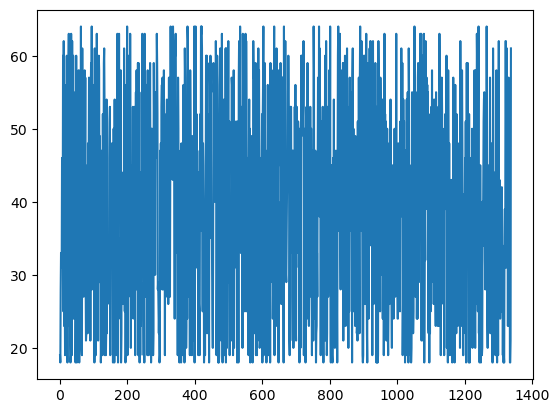

In [81]:
X['age'].plot()

<Axes: ylabel='Frequency'>

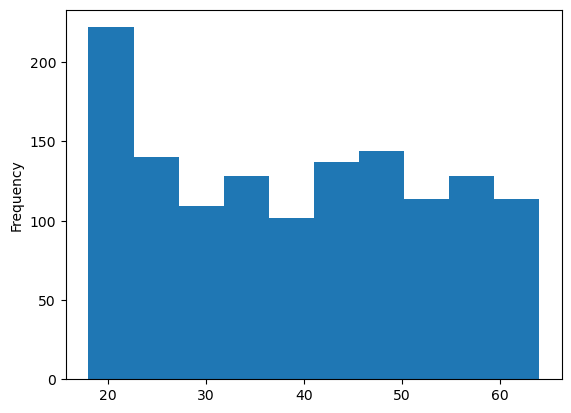

In [82]:
X['age'].plot(kind="hist")

<Axes: ylabel='Frequency'>

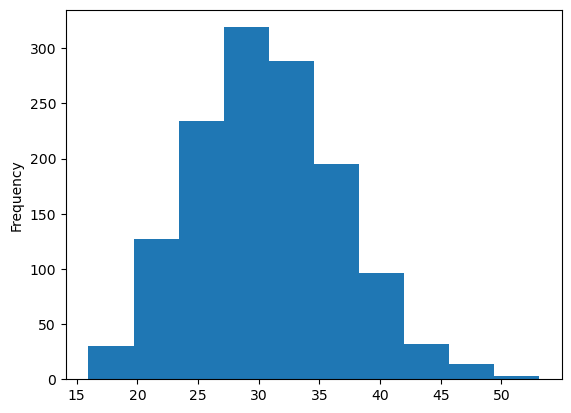

In [83]:
X['bmi'].plot(kind="hist")

In [86]:
X["children"].value_counts()

0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64

In [87]:
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

# Read in the insurance dataframe
insurance = pd.read_csv('./insurance.csv')
insurance

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


To prepare our data, we can borrow a few classes from Scikit-Learn

In [94]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.model_selection import train_test_split

# Create a column transformer
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # turn all values in these columns between o and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y 
X = insurance.drop("charges", axis=1)
y = insurance['charges']

# Build our train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# Fit the column transformer to our training data
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and OneHotEncoder
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [95]:
# What does our data look like now?
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [96]:
X_train_normal[0]

array([0.60869565, 0.10734463, 0.4       , 1.        , 0.        ,
       1.        , 0.        , 0.        , 1.        , 0.        ,
       0.        ])

In [97]:
X_train.shape, X_train_normal.shape

((1070, 6), (1070, 11))

Alright! Our data has been normalized and one hot encoded. Now let's build a neural network model on it and see how it goes.

In [98]:
# Build a neural network model to fit on our normalized data

# set random seed
tf.random.set_seed(42)

# Create the model
insurance_model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(100),
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# Compile the model
insurance_model_4.compile(loss=tf.keras.losses.mae,
                       optimizer=tf.keras.optimizers.Adam(),
                       metrics=['mae'])

# fit the model
history = insurance_model_4.fit(X_train_normal, y_train, epochs=100)

Epoch 1/100
34/34 [==============================] - 1s 8ms/step - loss: 13343.2871 - mae: 13343.2871
Epoch 2/100
34/34 [==============================] - 0s 7ms/step - loss: 13334.5869 - mae: 13334.5869
Epoch 3/100
34/34 [==============================] - 0s 7ms/step - loss: 13312.9688 - mae: 13312.9688
Epoch 4/100
34/34 [==============================] - 0s 7ms/step - loss: 13267.3555 - mae: 13267.3555
Epoch 5/100
34/34 [==============================] - 0s 7ms/step - loss: 13186.2461 - mae: 13186.2461
Epoch 6/100
34/34 [==============================] - 0s 7ms/step - loss: 13058.6416 - mae: 13058.6416
Epoch 7/100
34/34 [==============================] - 0s 7ms/step - loss: 12874.4902 - mae: 12874.4902
Epoch 8/100
34/34 [==============================] - 0s 7ms/step - loss: 12623.8545 - mae: 12623.8545
Epoch 9/100
34/34 [==============================] - 0s 7ms/step - loss: 12296.6084 - mae: 12296.6084
Epoch 10/100
34/34 [==============================] - 0s 7ms/step - loss: 11889.56

In [99]:
# Evaluate our insurance model trained on normalized data
insurance_model_4.evaluate(X_test_normal, y_test)

9/9 [==============================] - 0s 7ms/step - loss: 3437.3848 - mae: 3437.3848


[3437.384765625, 3437.384765625]